In [1]:
import pandas as pd
data = pd.read_csv("D:\\DATA ANALYTICS PROJECTS\\PYTHON PROJECTS\\archive\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Check for missing values
print(data.isnull().sum())

# Convert 'TotalCharges' to numeric, using 'coerce' to set errors to NaN for non-numeric entries
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for any NaN values after conversion
print(data['TotalCharges'].isnull().sum())

# Fill missing values in 'TotalCharges' with the median or mean value
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Verify that there are no missing values left
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
11
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [3]:
# Identify categorical columns to encode
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                    'PaperlessBilling', 'PaymentMethod']

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded data to verify
data_encoded.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,0,34,56.95,1889.50,No,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,53.85,108.15,Yes,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,0,45,42.30,1840.75,No,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,Yes,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [4]:
# Define the target variable 'y'
y = data_encoded['Churn']

# Drop the 'Churn' column from the features to create 'X'
X = data_encoded.drop(columns=['Churn'])

# Check the shapes of X and y to verify
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (7043, 31)
Target shape: (7043,)


In [5]:
# Define tenure groups
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 year'
    elif tenure <= 24:
        return '1-2 years'
    elif tenure <= 48:
        return '2-4 years'
    elif tenure <= 60:
        return '4-5 years'
    else:
        return '5+ years'

# Apply the tenure group function and create a new column
data_encoded['TenureGroup'] = data_encoded['tenure'].apply(tenure_group)

# One-hot encode the tenure groups
data_encoded = pd.get_dummies(data_encoded, columns=['TenureGroup'], drop_first=True)

In [6]:
# Define spending bins for MonthlyCharges
data_encoded['MonthlyChargesBin'] = pd.cut(data_encoded['MonthlyCharges'], 
                                           bins=[0, 30, 60, 90, 120], 
                                           labels=['Low', 'Medium', 'High', 'Very High'])

# One-hot encode the MonthlyChargesBin
data_encoded = pd.get_dummies(data_encoded, columns=['MonthlyChargesBin'], drop_first=True)

In [7]:
# Create a proxy for account age in years
data_encoded['AccountAgeYears'] = data_encoded['tenure'] / 12

In [8]:
# Interaction term for tenure and MonthlyCharges
data_encoded['Tenure_MonthlyCharges'] = data_encoded['tenure'] * data_encoded['MonthlyCharges']

In [9]:
# Approximate Customer Lifetime Value
data_encoded['CLV'] = data_encoded['MonthlyCharges'] * data_encoded['tenure']

In [10]:
# Display the first few rows of the dataset to verify the new features
data_encoded[['tenure', 'MonthlyCharges', 'Tenure_MonthlyCharges', 'CLV']].head()

,tenure,MonthlyCharges,Tenure_MonthlyCharges,CLV
0,1,29.85,29.85,29.85
1,34,56.95,1936.30,1936.30
2,2,53.85,107.70,107.70
3,45,42.30,1903.50,1903.50
4,2,70.70,141.40,141.40


In [11]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_encoded.drop(columns=['Churn', 'customerID'])  # Exclude customerID
y = data_encoded['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5634, 40)
Testing set shape: (1409, 40)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("Logistic Regression AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))


Logistic Regression Performance:
              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1036
         Yes       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409

Logistic Regression AUC: 0.8587848189054623


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
log_reg = LogisticRegression(solver='saga', max_iter=2000, random_state=42)

# Set up the parameter grid
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2']                # Regularization type
}

# Initialize GridSearchCV
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='roc_auc')

# Fit GridSearchCV
grid_search_log_reg.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best parameters for Logistic Regression:", grid_search_log_reg.best_params_)
print("Best AUC score for Logistic Regression:", grid_search_log_reg.best_score_)


Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l2'}
Best AUC score for Logistic Regression: 0.8417367728730891


In [16]:
best_log_reg = LogisticRegression(C=100, penalty='l2', max_iter=1000, random_state=42)
best_log_reg.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=1000, random_state=42)

In [17]:
y_pred_best_log = best_log_reg.predict(X_test)
print("Final Logistic Regression Performance:")
print(classification_report(y_test, y_pred_best_log))
print("Final Logistic Regression AUC:", roc_auc_score(y_test, best_log_reg.predict_proba(X_test)[:, 1]))

Final Logistic Regression Performance:
              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1036
         Yes       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409

Final Logistic Regression AUC: 0.8587848189054624


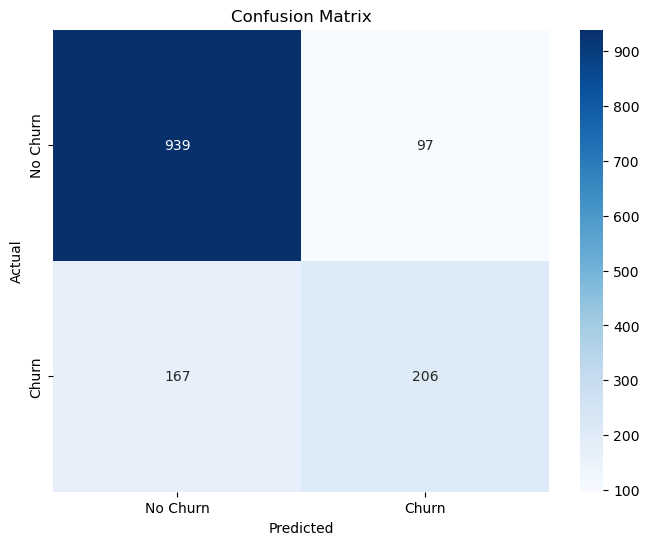

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_best_log)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [19]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation
cv_scores = cross_val_score(best_log_reg, X, y, cv=10, scoring='roc_auc')
print(f"Cross-validated AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validated AUC: 0.8431 ± 0.0139


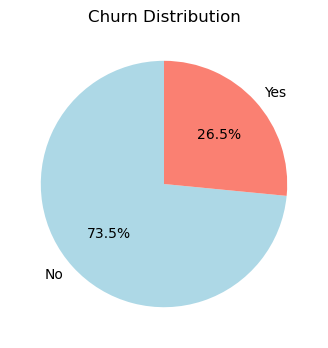

In [20]:
plt.figure(figsize=(6, 4))
data['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

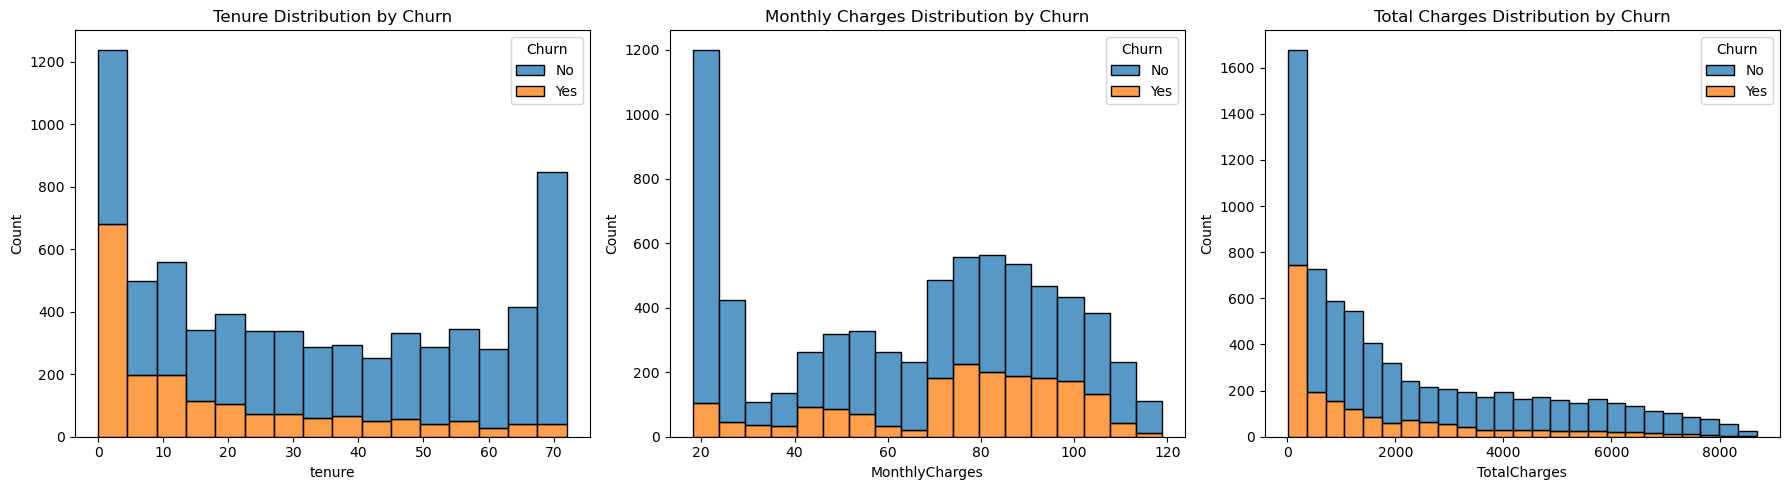

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack', ax=axes[0])
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', multiple='stack', ax=axes[1])
sns.histplot(data=data, x='TotalCharges', hue='Churn', multiple='stack', ax=axes[2])
axes[0].set_title('Tenure Distribution by Churn')
axes[1].set_title('Monthly Charges Distribution by Churn')
axes[2].set_title('Total Charges Distribution by Churn')
plt.tight_layout()
plt.show()

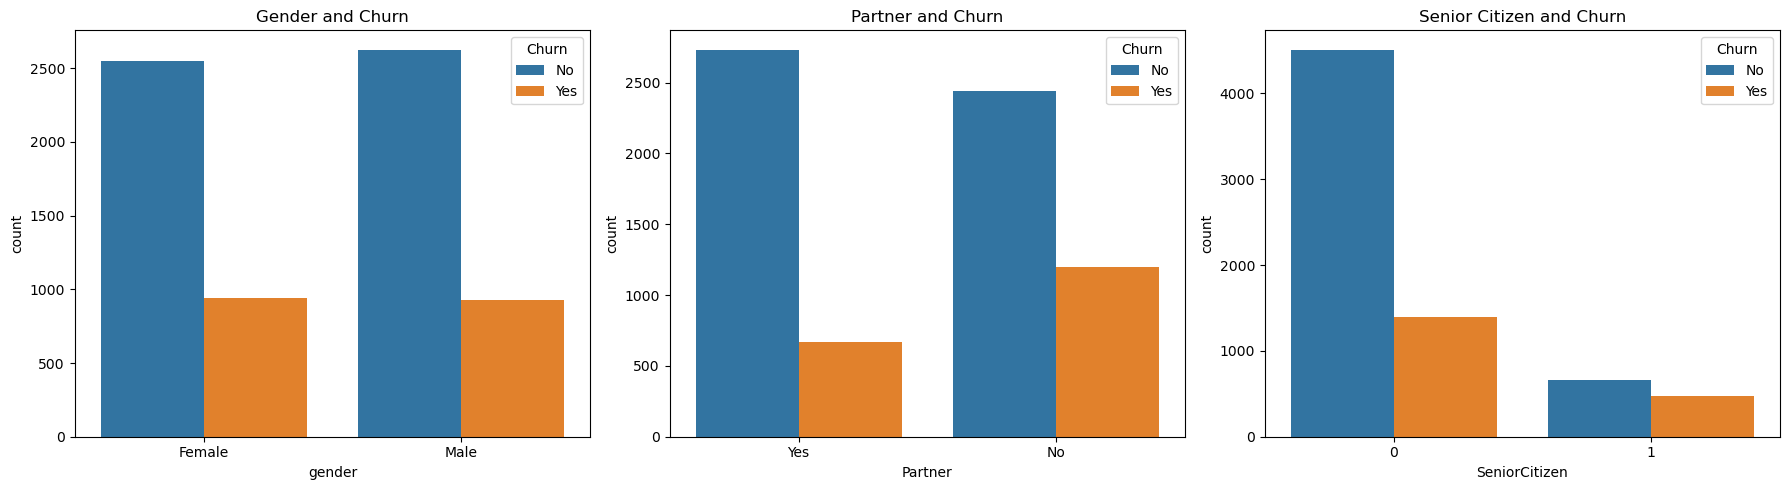

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='gender', hue='Churn', data=data, ax=axes[0])
sns.countplot(x='Partner', hue='Churn', data=data, ax=axes[1])
sns.countplot(x='SeniorCitizen', hue='Churn', data=data, ax=axes[2])
axes[0].set_title('Gender and Churn')
axes[1].set_title('Partner and Churn')
axes[2].set_title('Senior Citizen and Churn')
plt.tight_layout()
plt.show()

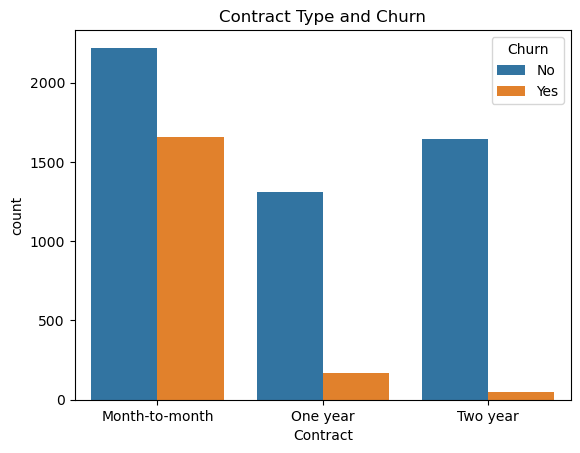

In [23]:
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Contract Type and Churn')
plt.show()

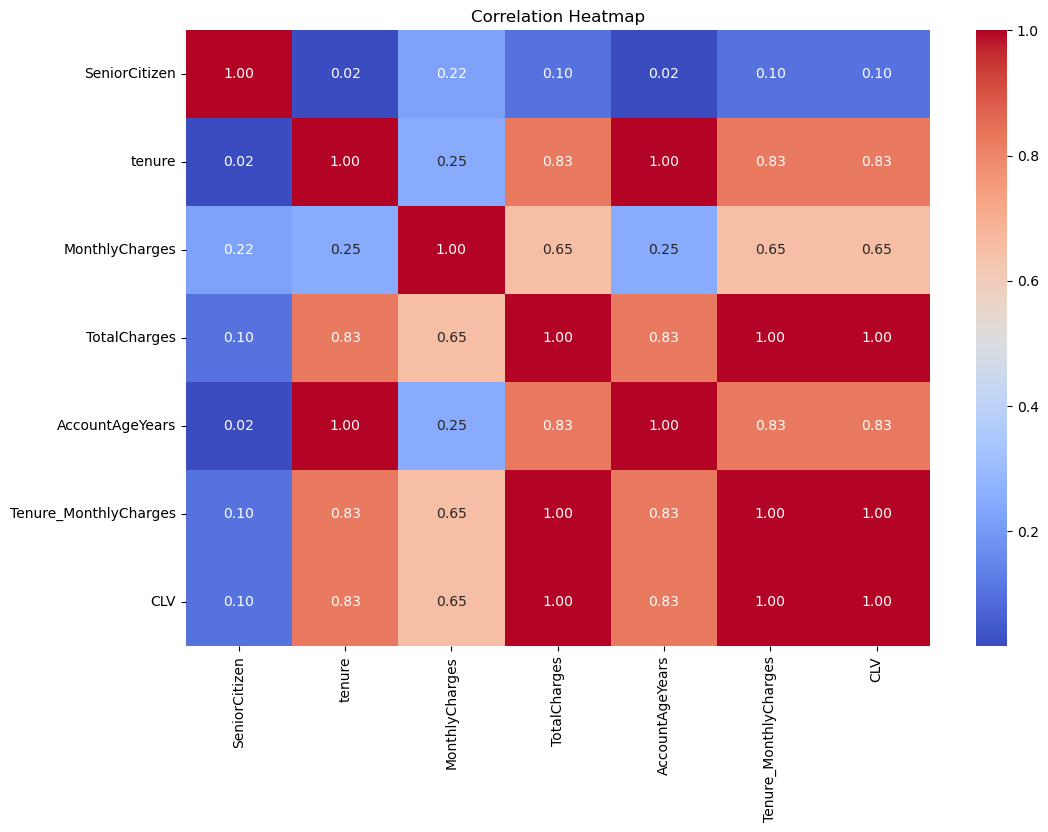

In [25]:
# Drop any non-numeric columns (e.g., 'customerID') from the DataFrame
numeric_data = data_encoded.select_dtypes(include=[float, int])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


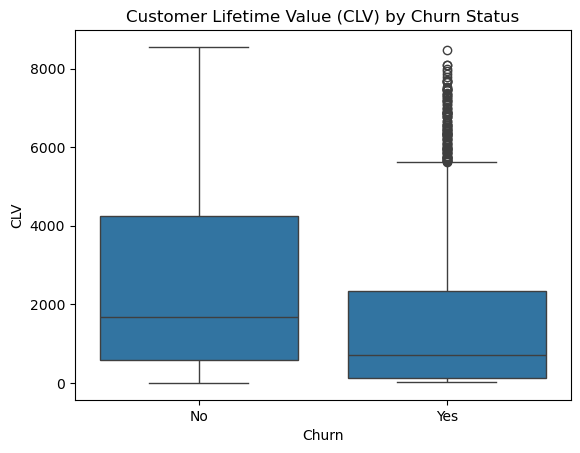

In [26]:
sns.boxplot(x='Churn', y='CLV', data=data_encoded)
plt.title('Customer Lifetime Value (CLV) by Churn Status')
plt.show()